# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import csv

In [2]:
from jupyterthemes import jtplot
jtplot.style()

## Get Training Data

In [3]:
dfx = pd.read_csv("Training Data/Linear_X_Train.csv")
dfy = pd.read_csv("Training Data/Linear_Y_Train.csv")

x = dfx.values
y = dfx.values

print(x.shape)
print(y.shape)

(3750, 1)
(3750, 1)


In [4]:
# print(dfy)

## Visualise

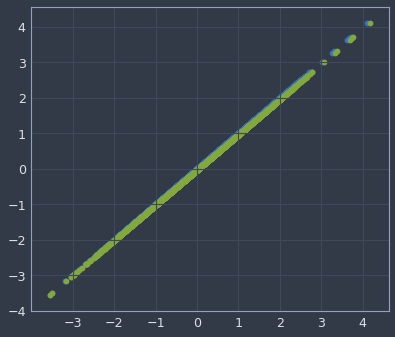

In [5]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()

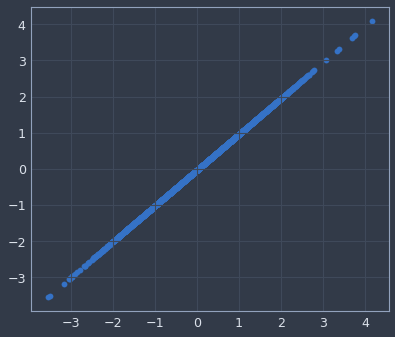

In [6]:
plt.scatter(X,Y)
plt.show()

In [7]:
def hypothesis(x, theta):
    return theta[0] + theta[1]*x

In [8]:
def error(X,Y,theta):
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
    return error

In [9]:
def gradient(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] += (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
    return grad

In [10]:
def gradientDescent(X,Y,learning_rate=0.0001):
    theta = np.zeros((2,))
    
    itr = 0
    max_itr=100
    
    err_list = []
    
    while(itr<=max_itr):
        
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        err_list.append(e)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        itr += 1
    
    return theta,err_list

In [11]:
final_theta, error_list = gradientDescent(X,Y)

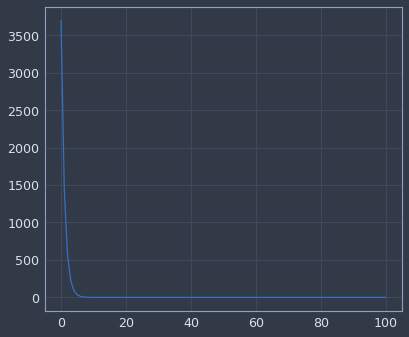

In [12]:
plt.plot(error_list)
plt.show()

In [13]:
print(final_theta)

[-0.03779466  0.99208013]


### Plot the line for testing data

In [14]:
xtest = pd.read_csv("Test Cases/Linear_X_Test.csv")

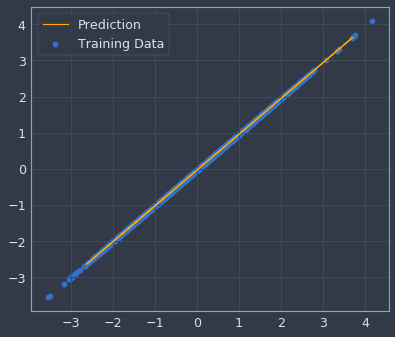

In [15]:
plt.scatter(X,Y,label="Training Data")
plt.plot(xtest,hypothesis(xtest,final_theta),color="orange",label="Prediction")
plt.legend()
plt.show()

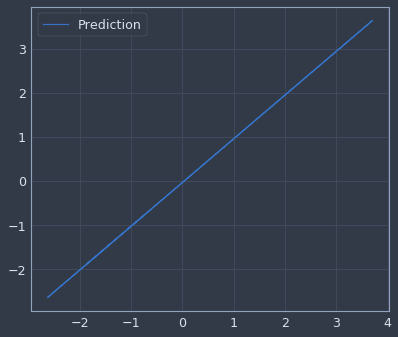

In [16]:
plt.plot(xtest,hypothesis(xtest,final_theta),label="Prediction")
plt.legend()
plt.show()

In [17]:
dfx.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [18]:
dfy.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [19]:
yans = hypothesis(xtest,final_theta)

In [20]:
yans.head()

,x
0,-1.900866
1,-0.899944
2,-2.547938
3,2.700550
4,0.548525


In [21]:
yans.columns = ['score']

In [22]:
yans.head()

,score
0,-1.900866
1,-0.899944
2,-2.547938
3,2.700550
4,0.548525


In [23]:
df_concat = pd.concat([xtest,yans], axis=1)

In [24]:
df_concat.columns = ['time','score']

In [25]:
df_concat.head()

,time,score
0,-1.877944,-1.900866
1,-0.869032,-0.899944
2,-2.530182,-2.547938
3,2.760205,2.700550
4,0.591000,0.548525


In [26]:
# df_concat.to_csv("submission.csv", sep='\t')

In [27]:
yans.head()

,score
0,-1.900866
1,-0.899944
2,-2.547938
3,2.700550
4,0.548525


In [28]:
print(yans.shape[0])
print(xtest.shape[0])

1250
1250


In [29]:
print(xtest.values[0])

[-1.87794441]


In [30]:
with open('Sample_Submission.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    m = yans.shape[0]
    writer.writerow(["y"])
    for i in range(m):
        l = yans.values[i]
        writer.writerow(l)
    csvFile.close()

In [31]:
ans = pd.read_csv("Sample_Submission.csv")

In [32]:
print(ans)

             y
0    -1.900866
1    -0.899944
2    -2.547938
3     2.700550
4     0.548525
5    -1.323134
6    -0.233064
7     0.251969
8    -0.852980
9    -1.527469
10   -0.215133
11    0.033831
12   -0.538426
13    0.757000
14    0.059808
15   -0.200122
16    0.242627
17    1.243185
18    2.099240
19    0.200758
20   -0.466528
21    0.189593
22   -0.730311
23   -1.894449
24    0.772928
25    1.272627
26    1.829057
27    0.062058
28    0.343059
29   -1.216842
...        ...
1220 -0.240959
1221  0.339545
1222  0.701524
1223  0.406949
1224 -1.197175
1225 -1.337815
1226  0.701452
1227 -1.332196
1228  0.613810
1229 -1.071573
1230 -1.139869
1231  0.228603
1232 -1.280488
1233 -0.086827
1234 -0.512849
1235 -0.961151
1236 -0.531726
1237 -0.393825
1238  1.043719
1239  0.854421
1240 -0.202259
1241 -0.093801
1242  1.015564
1243  0.306609
1244 -0.979589
1245 -0.204522
1246  0.887045
1247  0.089199
1248 -0.313630
1249 -0.712831

[1250 rows x 1 columns]
